# NLP - Hotel review sentiment analysis

In [142]:
import warnings
warnings.filterwarnings('ignore')


## Reading Data

In [90]:
import pandas as pd 

Reviewdata = pd.read_csv('train.csv')
#Data Credit - https://www.kaggle.com/anu0012/hotel-review/data

In [91]:
Reviewdata.shape

(38932, 5)

In [4]:
Reviewdata.head()

,User_ID,Description,Browser_Used,Device_Used,Is_Response
0,id10326,The room was kind of clean but had a VERY stro...,Edge,Mobile,not happy
1,id10327,I stayed at the Crown Plaza April -- - April -...,Internet Explorer,Mobile,not happy
2,id10328,I booked this hotel through Hotwire at the low...,Mozilla,Tablet,not happy
3,id10329,Stayed here with husband and sons on the way t...,InternetExplorer,Desktop,happy
4,id10330,My girlfriends and I stayed here to celebrate ...,Edge,Tablet,not happy


In [92]:
Reviewdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38932 entries, 0 to 38931
Data columns (total 5 columns):
User_ID         38932 non-null object
Description     38932 non-null object
Browser_Used    38932 non-null object
Device_Used     38932 non-null object
Is_Response     38932 non-null object
dtypes: object(5)
memory usage: 1.5+ MB


In [93]:
Reviewdata.describe().transpose()

,count,unique,top,freq
User_ID,38932,38932,id16854,1
Description,38932,38932,The Good Nite Inn on Greenwood is good only if...,1
Browser_Used,38932,11,Firefox,7367
Device_Used,38932,3,Desktop,15026
Is_Response,38932,2,happy,26521


In [94]:
Reviewdata.isnull().sum()

User_ID         0
Description     0
Browser_Used    0
Device_Used     0
Is_Response     0
dtype: int64

In [95]:
Reviewdata.isnull().sum().sort_values(ascending=False)

Is_Response     0
Device_Used     0
Browser_Used    0
Description     0
User_ID         0
dtype: int64

## Data Cleaning / EDA

In [96]:
### Checking Missing values in the Data Set and printing the Percentage for Missing Values for Each Columns ###

count = Reviewdata.isnull().sum().sort_values(ascending=False)
percentage = ((Reviewdata.isnull().sum()/len(Reviewdata)*100)).sort_values(ascending=False)
missing_data = pd.concat([count, percentage], axis=1, keys=['Count','Percentage'])

print('Count and percentage of missing values for the columns:')

missing_data

Count and percentage of missing values for the columns:


,Count,Percentage
Is_Response,0,0.0
Device_Used,0,0.0
Browser_Used,0,0.0
Description,0,0.0
User_ID,0,0.0


Percentage for default

1    68.12
0    31.88
Name: Is_Response, dtype: float64


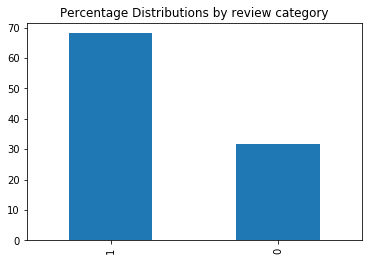

In [143]:
### Checking for the Distribution of Default ###
import matplotlib.pyplot as plt
%matplotlib inline

print('Percentage for default\n')
print(round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2))
round(Reviewdata.Is_Response.value_counts(normalize=True)*100,2).plot(kind='bar')
plt.title('Percentage Distributions by review category')
plt.show()

In [97]:
#Removing  unnecessary columns
Reviewdata.drop(columns = ['User_ID', 'Browser_Used', 'Device_Used'], inplace = True)

In [98]:
print (string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [99]:
def clean_Data(text):
    text=str(text).lower()
    
    p=set(string.punctuation)
    for i in range(10):
        p.add(str(i))
        
    words=text.split()
    text=[]
    for word in words:
        text_word=''.join(i for i in word if i not in p)
        text.append(text_word)
    return ' '.join(text)


**Removing Stop words and punctuations**

In [100]:
from nltk.corpus import stopwords

stop=set(stopwords.words('english'))
stop.remove('no')
stop.remove('not')
#print (stop)


clean_doc=[]
for doc in Reviewdata['Description'].values:
    clean_text=clean_Data(doc)
    if len(clean_text)!=0:
        clean_doc.append(clean_text)
    else:
        clean_doc.append('NAN')
    
Reviewdata['Cleaned_data']=clean_doc


In [101]:
# Null values are not present after data cleansing

Reviewdata[Reviewdata['Cleaned_data']=='NAN'].count()

Description     0
Is_Response     0
Cleaned_data    0
dtype: int64

In [102]:
Reviewdata.head()

,Description,Is_Response,Cleaned_data
0,The room was kind of clean but had a VERY stro...,not happy,the room was kind of clean but had a very stro...
1,I stayed at the Crown Plaza April -- - April -...,not happy,i stayed at the crown plaza april april th...
2,I booked this hotel through Hotwire at the low...,not happy,i booked this hotel through hotwire at the low...
3,Stayed here with husband and sons on the way t...,happy,stayed here with husband and sons on the way t...
4,My girlfriends and I stayed here to celebrate ...,not happy,my girlfriends and i stayed here to celebrate ...


**Stemming**

In [103]:
from nltk.stem.snowball import SnowballStemmer

s=SnowballStemmer("english")

clean_doc1=[]
for sent in Reviewdata['Cleaned_data'].values:
    d=' '.join(s.stem(word) for word in sent.split())
    clean_doc1.append(d)

Reviewdata['Cleaned_data1']=clean_doc1       


In [104]:

#df.rename({'a': 'X', 'b': 'Y'}, axis=1, inplace=True)
Reviewdata.rename({'Cleaned_data1':'Cleaned_data_new'},axis=1, inplace=True)

**Data after stemming**

In [109]:
Reviewdata.head()

,Description,Is_Response,Cleaned_data,Cleaned_data_new
0,The room was kind of clean but had a VERY stro...,0,the room was kind of clean but had a very stro...,the room was kind of clean but had a veri stro...
1,I stayed at the Crown Plaza April -- - April -...,0,i stayed at the crown plaza april april th...,i stay at the crown plaza april april the staf...
2,I booked this hotel through Hotwire at the low...,0,i booked this hotel through hotwire at the low...,i book this hotel through hotwir at the lowest...
3,Stayed here with husband and sons on the way t...,1,stayed here with husband and sons on the way t...,stay here with husband and son on the way to a...
4,My girlfriends and I stayed here to celebrate ...,0,my girlfriends and i stayed here to celebrate ...,my girlfriend and i stay here to celebr our th...


In [106]:
Reviewdata['Is_Response'].value_counts()

happy        26521
not happy    12411
Name: Is_Response, dtype: int64

In [107]:
Reviewdata['Is_Response'].unique()

array(['not happy', 'happy'], dtype=object)

In [108]:
#data['decision']= data['decision'].replace('positive',1)
Reviewdata['Is_Response']=Reviewdata['Is_Response'].replace('happy',1)
Reviewdata['Is_Response']=Reviewdata['Is_Response'].replace('not happy',0)


## Model training 

In [110]:
from sklearn.model_selection import train_test_split

Input = Reviewdata.Cleaned_data_new
Target = Reviewdata.Is_Response

Input_train, Input_test, Target_train, Target_test = train_test_split(Input, Target, test_size = 0.2, random_state = 225)

print('Input_train :', len(Input_train))
print('Input_test  :', len(Input_test))
print('Target_train :', len(Target_train))
print('Target_test  :', len(Target_test))


Input_train : 31145
Input_test  : 7787
Target_train : 31145
Target_test  : 7787


In [111]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")


**Tf-Idf vectorization**

In [123]:
#converting sentences to Tf-Idf vectors
tvec.fit(Input_train)

#transform
Tfidf_Input=tvec.transform(Input_train)
Tfidf_test=tvec.transform(Input_test)


In [134]:
#Tfidf_test[0:10].toarray()

In [126]:
# Model training

clf2.fit(Tfidf_Input, Target_train)

#predictions

predictions = clf2.predict(Tfidf_test)
confusion_matrix(predictions, Target_test)

array([[1950,  305],
       [ 586, 4946]], dtype=int64)

## Model prediciton 

In [127]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, Target_test))
print("Precision : ", precision_score(predictions, Target_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, Target_test, average = 'weighted'))

Accuracy :  0.8855785283164248
Precision :  0.8918209496589374
Recall :  0.8855785283164248


## Trying on new reviews 

In [132]:
example = ["good service"]
example_test=tvec.transform(example)
#result = model.predict(example)

result = clf2.predict(example_test)

print(result)

[1]


# Using Pipeline

In [138]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix

tvec = TfidfVectorizer()
clf2 = LogisticRegression(solver = "lbfgs")

model = Pipeline([('vectorizer',tvec),('classifier',clf2)])
model.fit(Input_train, Target_train)

Pipeline(memory=None,
     steps=[('vectorizer', TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=None, min_df=1,
        ngram_range=(1, 1), norm='l2', preprocessor=None, smooth_idf=Tr...enalty='l2', random_state=None, solver='lbfgs', tol=0.0001,
          verbose=0, warm_start=False))])

In [139]:
predictions = model.predict(Input_test)

confusion_matrix(predictions, Target_test)

array([[1950,  305],
       [ 586, 4946]], dtype=int64)

In [140]:
from sklearn.metrics import accuracy_score, precision_score, recall_score

print("Accuracy : ", accuracy_score(predictions, Target_test))
print("Precision : ", precision_score(predictions, Target_test, average = 'weighted'))
print("Recall : ", recall_score(predictions, Target_test, average = 'weighted'))

Accuracy :  0.8855785283164248
Precision :  0.8918209496589374
Recall :  0.8855785283164248


**Trying on new reviews**

In [141]:
example = ["good service"]

result = model.predict(example)

print(result)

[1]
